In [1]:
%matplotlib inline 
import numpy as np
import h5py
import caffe
import matplotlib.pyplot as plt

In [2]:
#Read non-labeled data
f = h5py.File("facialkp/caffe-facialkp/facialkp-unlabeled.hd5", "r")
X = f['data'][:]
#Y = f['label']
#D = f['certainty']
f.close()

In [3]:
#Expect 1783 images, 96x96 each
X.shape

(1783, 96, 96)

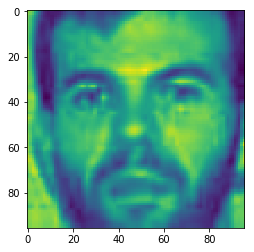

In [4]:
#Draw some random picture
plt.imshow(X[920,:,:])

In [5]:
Xshaped = X[920,:,:].copy()
Xshaped = Xshaped.reshape((1,1,96,96))

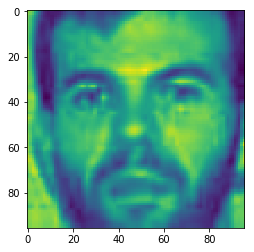

In [6]:
plt.imshow(Xshaped[0,0,:,:])

In [7]:
net = caffe.Net('facialkp/caffe-facialkp/facialkp_predict.python.prototxt',
                'facialkp/caffe-facialkp/tmp_iter_2000.caffemodel',
                caffe.TEST)

In [8]:
net.blobs['data'].reshape(*Xshaped.shape)

In [9]:
net.blobs['data'].data[...] = Xshaped

In [10]:
net.forward()

{'ip2': array([[ 0.60256422,  0.4284398 ,  0.3897908 ,  0.42810026,  0.63247424,
          0.36730722,  0.73356944,  0.36880365,  0.43956879,  0.36621612,
          0.34083337,  0.36768749,  0.60717905,  0.29540592,  0.78542   ,
          0.30413848,  0.46277815,  0.2953735 ,  0.28556591,  0.30543897,
          0.49510282,  0.51498151,  0.65089667,  0.67141807,  0.42187053,
          0.67124772,  0.53475839,  0.62900412,  0.49700063,  0.71732014]], dtype=float32)}